## Taller: Análisis de velocidad (ej. 1)

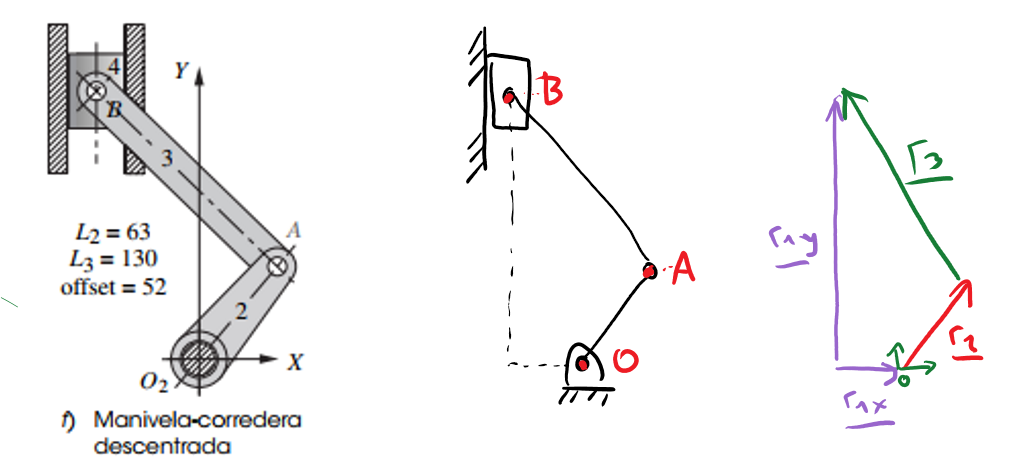

Tomado de Norton (2013)

Partiendo de este diagrama vectorial, podemos obtener la siguiente ecuación vectorial

$\overrightarrow{r_{2}}+\overrightarrow{r_{3}}-\overrightarrow{r_{1y}}+\overrightarrow{r_{1x}}=0$ ,

cuyas ecuaciones escalares correspondientes son

$r2\cdot cos(\theta_{2})+r3\cdot cos(\theta_{3})+r_{1x}=0$, (2)

$r2\cdot sin(\theta_{2})+r3\cdot sin(\theta_{3})-r_{1y}=0$ (3)

Por favor complete el análisis de velocidad para este mecanismo:
1. Deberá completar el análisis de posición y corregir los problemas que tenga el código, si los encuentra.
2. Deberá obtener las derivadas con respecto al tiempo por método analítico y numérico para una revolución completa de la manivela (deben dar lo mismo excepto en los extremos)
3. Deberá calcular la velocidad del punto B

### 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.animation import FuncAnimation


def manivelaCorredera(condIni, params):
    #variable de entrada y parámetros
    ## Primero la variable de entrada
    th2 = params[0]
    ## Luego los parámetros
    r2 = params[1]
    r3 = params[2]
    r1x = params[3]
    
    # las condiciones iniciales deben darse para que el método funcione
    th3 = condIni[0]
    r1y = condIni[1]
    
    # creamos el vector donde quedará la salida, inicialmente con ceros
    Y = np.zeros(2)
    # Definimos las ecuaciones escalares no lineales
    Y[0] = r2*np.cos(th2) + r3*np.cos(th3) + r1x;
    Y[1] = r2*np.sin(th2) + r3*np.sin(th3) - r1y;
    
    return Y

# le damos valores a los parámetros y variables

r2 = 0
r3 = 0
r1x = 0
th2 = np.deg2rad(0)
varEntrada = th2
params = [0,0,0,0]

print("Parámetros: ",params)

th3 = np.deg2rad(0)
r1y = 0

x0 = np.array([th3,r1y])
print("Condiciones iniciales: ",x0)
# ...y probamos la función

Y = manivelaCorredera(x0, params)
print("Evaluación de la función: ",Y)

Parámetros:  [0, 0, 0, 0]
Condiciones iniciales:  [0. 0.]
Evaluación de la función:  [0. 0.]


In [19]:
# Ahora especificamos el número de iteraciones

numpos = 50

# Luego definimos el vector que contiene los valores de la variable de entrada que queremos analizar

th2v = np.linspace(th2,th2+np.pi,numpos)

th3v = np.zeros(numpos)
r1yv = np.zeros(numpos)
exitflagV = np.zeros(numpos)

# Probar fsolve

[th3,r1y] = fsolve(manivelaCorredera,x0, args = params)

print("Solución usando fsolve: ",np.rad2deg(th3),r1y,)

# esto debe dar valores de las variables secundarias, verificar con análisis gráfico
# 
# ## Solución al sistema de ecuaciones con fsolve
for i in range(0,numpos):
    params[0] = th2v[i]
    q,info,exitflagV[i],mensaje = fsolve(manivelaCorredera,
                                        x0, 
                                        args = params,
                                        full_output = True)
    th3v[i] = q[0]
    r1yv[i] = q[1]
    x0 = q
    if exitflagV[i] != 1:
        print('Error en la iteración ' + str(i))
        break
if i+1 == numpos:
    print('se ejecutaron todas las iteraciones: ' + str(numpos))
    print(np.rad2deg(th3v))
    print(r1yv)

Solución usando fsolve:  0.0 0.0
se ejecutaron todas las iteraciones: 50
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [9]:
th2p = 2*np.pi # velocidad en radianes por segundo

## Verificación numérica

Podemos hacer una verificación con base en el análisis de posición usando derivación numérica. Para esto necesitaremos las gráficas de posición de las variables secundarias respecto a la de entrada

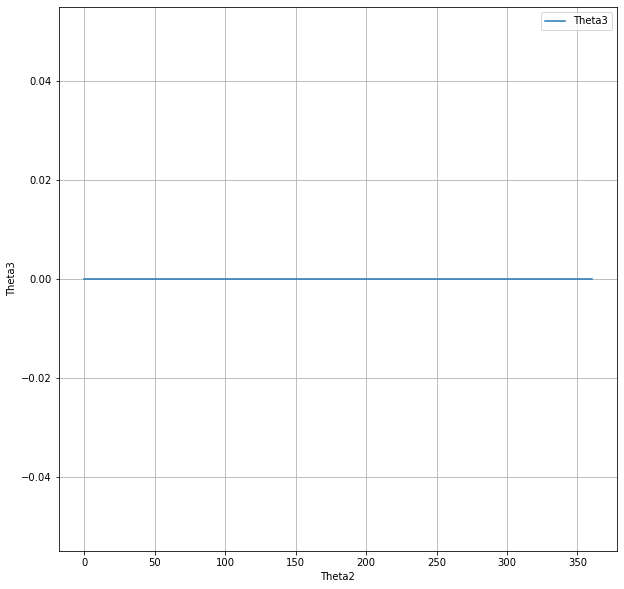

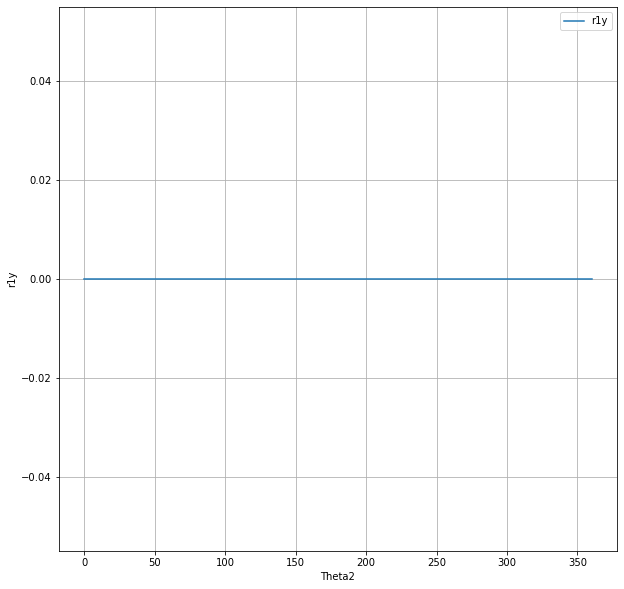

In [20]:
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend(["Theta3"])
plt.xlabel("Theta2")
plt.ylabel("Theta3")
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),r1yv)
plt.legend(["r1y"])
plt.xlabel("Theta2")
plt.ylabel("r1y")
plt.grid()

## Análisis de velocidad para un rango de valores



In [21]:
#Velocidad analitica
th3pv=np.zeros(numpos)
r1ypv=np.zeros(numpos)
velAm=np.zeros((numpos,3))
velBm=np.zeros((numpos,3))
for i in range(0,numpos):
    #calculos de velocidad aquí
    pass
    
th3pNumv=np.gradient(th3v,th2v)*th2p
r1ypNumv=np.gradient(r1yv,th2v)*th2p
#print(velAv)

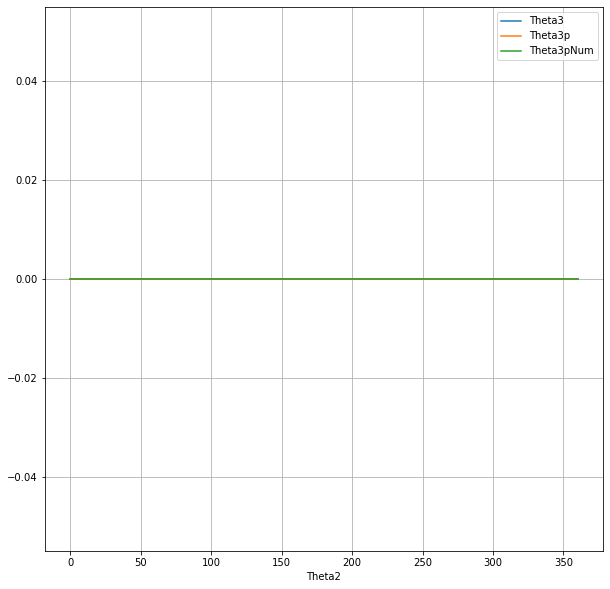

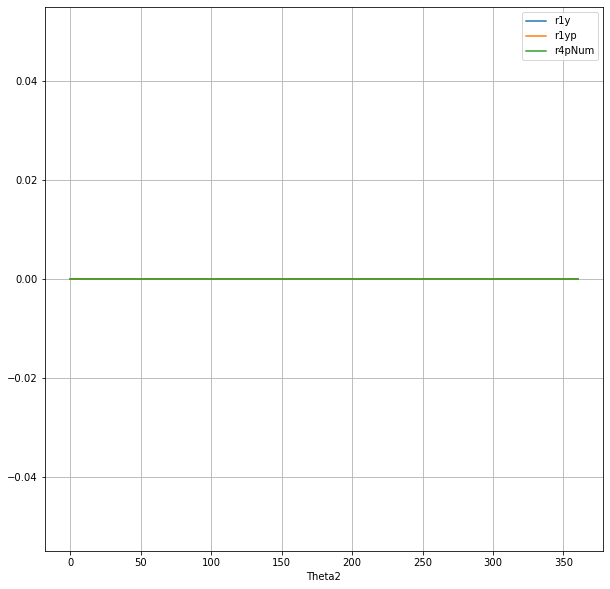

In [24]:
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.plot(np.rad2deg(th2v),np.rad2deg(th3pv))
plt.plot(np.rad2deg(th2v),np.rad2deg(th3pNumv))
plt.legend(["Theta3","Theta3p","Theta3pNum"])
plt.xlabel("Theta2")
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),r1yv)
plt.plot(np.rad2deg(th2v),r1ypv)
plt.plot(np.rad2deg(th2v),r1ypNumv)
plt.legend(["r1y","r1yp","r4pNum"])
plt.xlabel("Theta2")
plt.grid()

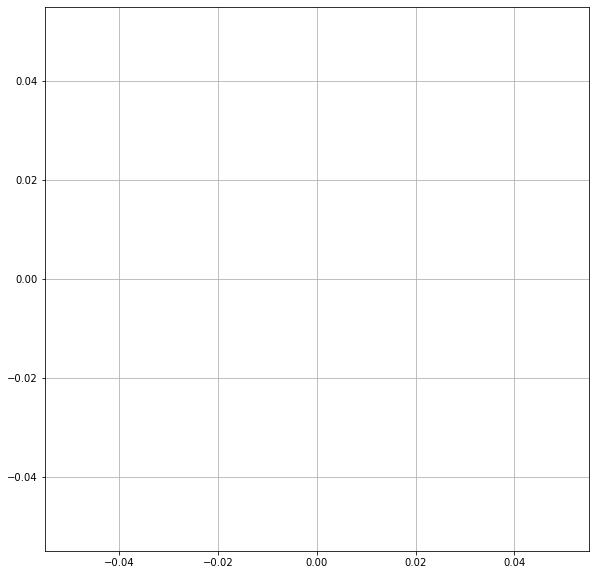

In [35]:
pos = 0

Ax = r2*np.cos(th2v)
Ay = r2*np.sin(th2v)
Bx = Ax + r3*np.cos(th3v)
By = Ay + r3*np.sin(th3v)
fig = plt.figure()
hr2 = plt.plot([0,Ax[pos]],[0,Ay[pos]])
hr3 = plt.plot([Bx[pos],Ax[pos]],[By[pos],Ay[pos]])

hVA = plt.quiver(Ax[pos], Ay[pos], velAm[pos,0], velAm[pos,1],
                 scale_units='xy', scale=4, color=(0,0,1,1))
hVB = plt.quiver(Bx[pos], By[pos], velBm[pos,0], velBm[pos,1],
                 scale_units='xy', scale=4, color=(0,0,1,1))

plt.axis("scaled")
plt.grid()
plt.draw() 

In [33]:
# ## Animación
# 
# Definimos la función que dibuja cada cuadro (plot)

# In[177]:

def animar(i):
    manivelaX = np.array([0,Ax[i]])
    manivelaY = np.array([0,Ay[i]])
    acopladorX = np.array([Bx[i],Ax[i]])
    acopladorY = np.array([By[i],Ay[i]])
    hr2[0].set_xdata(manivelaX)
    hr2[0].set_ydata(manivelaY)
    hr3[0].set_xdata(acopladorX)
    hr3[0].set_ydata(acopladorY)
    hVA.set_offsets([Ax[i], Ay[i]])
    hVA.set_UVC(velAm[i,0],velAm[i,1])

    hVB.set_offsets([Bx[i], By[i]])
    hVB.set_UVC(velBm[i,0],velBm[i,1])
    
animacion = FuncAnimation(fig, animar, interval=3000/numpos, save_count=numpos)

# Si se desea visualizar en un frame HTML5 para animaciones que queden muy pesadas en GIF (descomentar para publicación en NBViewer):

from IPython.display import HTML
HTML(animacion.to_html5_video())

C:\Users\Luis\anaconda3\lib\site-packages\matplotlib\quiver.py:644: RuntimeWarning: invalid value encountered in true_divide
  lengths = np.hypot(*dxy.T) / eps


In [95]:
#dir(hVA)

In [96]:
#help(hVA.set_UVC)